In [1]:
#CARICO IL DATASET

In [2]:
import pandas as pd
data = pd.read_csv("../Crop Recommendation Dataset/Crop_recommendation.csv")
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
#INIZIALIZZO IL GRAFICO

In [4]:
import matplotlib.pyplot as plt

plt.figure()

x = data['label']

<Figure size 640x480 with 0 Axes>

In [5]:
#MOSTRO IL GRAFICO N - label

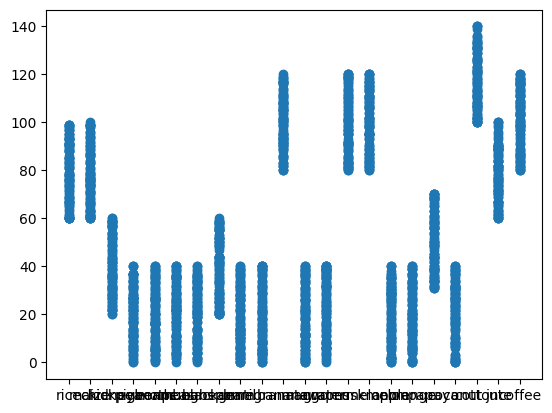

In [6]:
y = data['N']
plt.scatter(x,y)

In [7]:
#MOSTRO IL GRAFICO P - label

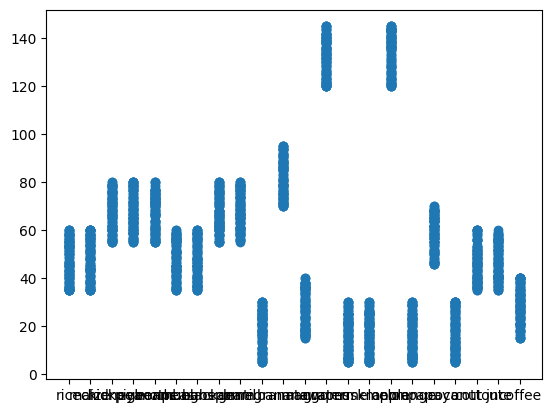

In [8]:
y = data['P']
plt.scatter(x,y)

In [9]:
#MOSTRO IL GRAFICO K - label

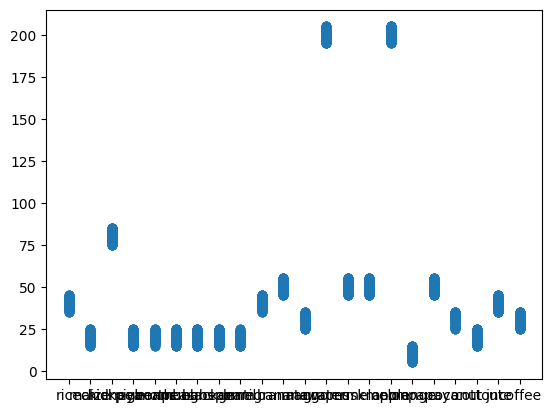

In [10]:
y = data['K']
plt.scatter(x,y)

In [11]:
#MOSTRO IL GRAFICO temperature - label

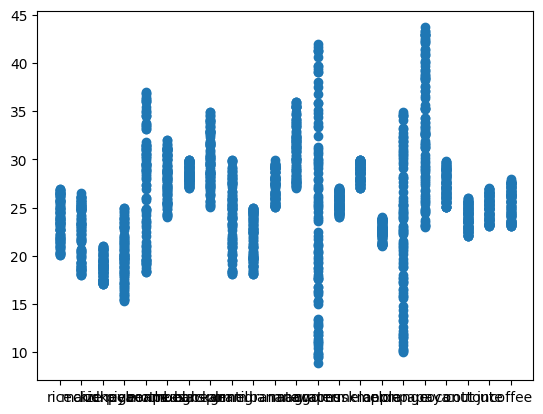

In [12]:
y = data['temperature']
plt.scatter(x,y)

In [13]:
#MOSTRO IL GRAFICO humidity - label

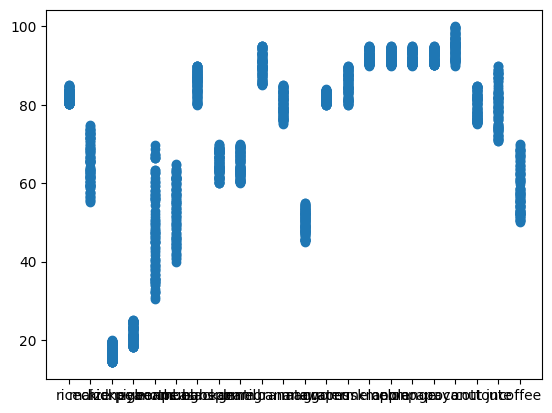

In [14]:
y = data['humidity']
plt.scatter(x,y)

In [15]:
#MOSTRO IL GRAFICO ph - label

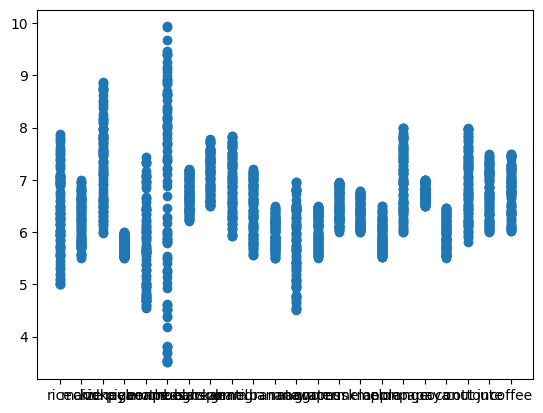

In [16]:
y = data['ph']
plt.scatter(x,y)

In [17]:
#MOSTRO IL GRAFICO rainfall - label

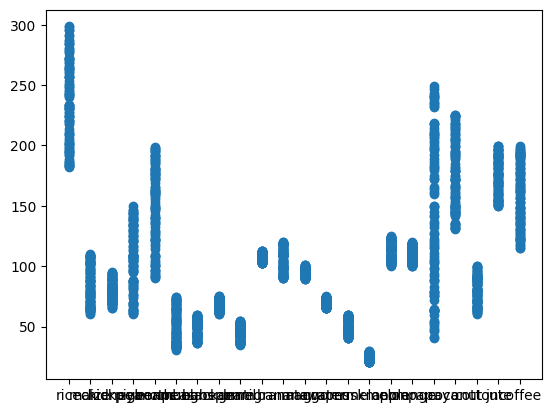

In [18]:
y = data['rainfall']
plt.scatter(x,y)

In [19]:
#PREPROCESSING

In [20]:
#NORMALIZZO (WEKA)

In [21]:
#CARICO IL DATASET PREPROCESSATO

In [22]:
data = pd.read_csv('../Crop Recommendation Dataset/Crop_recommendation.csv')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [23]:
#SEPARO LE VARIABILI

In [24]:
x = data.drop(['label'], axis=1).values
y = data['label'].values

In [25]:
#CREO IL MODELLO CON DECISION TREE

In [26]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(x, y)

DecisionTreeClassifier()

In [27]:
#MOSTRO I RISULTATI DELLA 10-FOLD CROSS VALIDATION

In [28]:
from sklearn.model_selection import cross_val_predict, cross_val_score

cross_val_predict(dt, x, y, cv=10)

dt_score = cross_val_score(dt, x, y, cv=10)

print(dt_score)
print(max(dt_score))

[0.99090909 0.98636364 0.99545455 0.99090909 0.99545455 0.99090909
 0.99545455 0.99545455 0.98181818 0.99090909]
0.9954545454545455


In [29]:
#CREO IL MODELLO CON K-NEAREST NEIGHBOUR

In [30]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x, y)

KNeighborsClassifier(n_neighbors=3)

In [31]:
#MOSTRO I RISULTATI DELLA 10-FOLD CROSS VALIDATION

In [32]:
cross_val_predict(neigh, x, y, cv=10)

neigh_score = cross_val_score(neigh, x, y, cv=10)

print(neigh_score)
print(max(neigh_score))

[0.98181818 0.97272727 0.97272727 0.97727273 0.98181818 0.98181818
 0.99090909 0.98181818 0.98181818 0.98181818]
0.990909090909091


In [33]:
#SALVO I MODELLI

In [34]:
import joblib

joblib.dump(dt, '../models/dt.sav')
joblib.dump(neigh, '../models/neigh.sav')

['../models/neigh.sav']